<a href="https://colab.research.google.com/github/devikaas2003/Machine-learning-Project-on-fake-news-detection/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📰 ML Project: Fake News Detection

This project implements a supervised machine learning pipeline to classify news articles as either **Real (0)** or **Fake (1)** using the WELFake Dataset.

## Project Steps Completed:
1.  **Data Preprocessing:** Cleaning and stemming of text.
2.  **Feature Engineering:** Conversion of text to numerical features using **TF-IDF Vectorization**.
3.  **Model Comparison:** Training and evaluation of two classification models: **Multinomial Naive Bayes** and **Support Vector Classifier (SVC)**.
---

In [ ]:
import pandas as pd
import sys
import csv


csv.field_size_limit(sys.maxsize)

df = pd.read_csv("/content/drive/MyDrive/ML__PROJECT/WELFake_Dataset.csv", on_bad_lines='skip', engine='python', sep=',', nrows=2000)
display(df.head())

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.shape

(2000, 4)

In [ ]:
df['label'].value_counts()

,count
label,
1,1055
0,945


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
title,20
text,0
label,0


In [ ]:
mode_title = df['title'].mode()[0]
df['title'].fillna(mode_title, inplace=True)

/tmp/ipython-input-2776566206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(mode_title, inplace=True)


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [ ]:
import re
import nltk
import pandas as pd
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
tk = TweetTokenizer()
sn = SnowballStemmer('english')
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub("[^0-9a-zA-Z]+", " ", text)
    tokens = tk.tokenize(text)
    tokens = [sn.stem(i.lower()) for i in tokens]
    tokens = [i for i in tokens if i not in sw]
    return " ".join(tokens)
tweets_clean = df['text'].apply(preprocess_text)
print("First 10 cleaned tweets:\n")
print(tweets_clean.head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 10 cleaned tweets:

0    comment expect barack obama member fyf 911 fuk...
1                            post vote hillari alreadi
2    demonstr gather last night exercis constitut p...
3    dozen polit activ pastor came privat dinner fr...
4    rs 28 sarmat missil dub satan 2 replac ss 18 f...
5    say one time someon su southern poverti law ce...
6          dr ben carson tell stori happen spoke obama
7                                                     
8    owner ringl bar locat south white sulphur spri...
9    file sept 15 2005 file photo marker welcom com...
Name: text, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_clean, df['label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.utils import resample

train_df = pd.DataFrame({'text': X_train, 'label': y_train})

real = train_df[train_df['label'] == 0]
fake = train_df[train_df['label'] == 1]

real_upsampled = resample(real, replace=True, n_samples=len(fake), random_state=42)
train_balanced = pd.concat([fake, real_upsampled]).sample(frac=1, random_state=42)

X_train = train_balanced['text']
y_train = train_balanced['label']

In [ ]:
train_balanced['label'].value_counts()

,count
label,
1,849
0,849


In [ ]:
X = train_balanced['text']
X

,text
537,mark ruffalo one movi industri outspoken advoc...
1587,one thing trump want next four year continu ho...
1594,republican parti fortun three age white career...
1611,trunew 11 07 16 jerom corsi dr peter jone elec...
1340,ankara reuter turkish prime minist binali yild...
...,...
1471,ankara reuter iranian presid hassan rouhani ur...
1147,washington hong kong reuter u lawmak take acti...
1263,wellington reuter new zealand labour leader ja...
774,attorney general jeff session told anybodi thi...


In [ ]:
y = train_balanced['label']
y

,label
537,1
1587,1
1594,1
1611,1
1340,0
...,...
1471,0
1147,0
1263,0
774,0


## Model 1: Multinomial Naive Bayes (Baseline)

The Multinomial Naive Bayes classifier was chosen as the initial **baseline model** due to its known efficiency and strong performance on text classification tasks using count-based features like TF-IDF.

The model was trained on the transformed data and evaluated on the test set.

| Metric | Result |
| :--- | :--- |
| **Overall Accuracy** | 0.8206 |
| **F1-Score (Fake News)** | 0.80  |
| **Prediction Speed** | Very Fast |

---


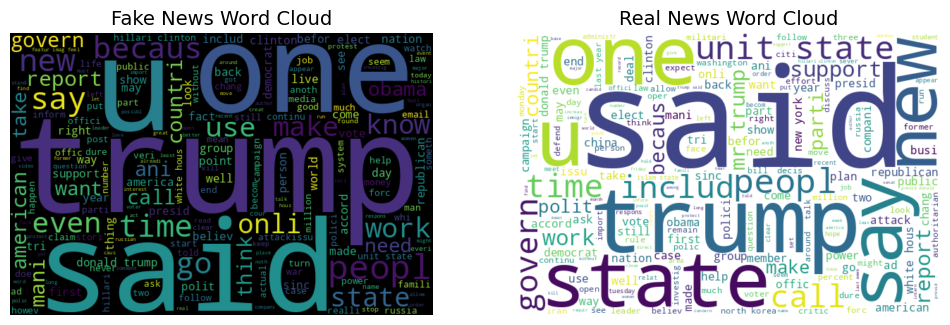

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


fake_text = " ".join(train_balanced[train_balanced['label'] == 1]['text'])
real_text = " ".join(train_balanced[train_balanced['label'] == 0]['text'])


wc_fake = WordCloud(width=600, height=400, background_color="black").generate(fake_text)
wc_real = WordCloud(width=600, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News Word Cloud", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wc_real, interpolation="bilinear")
plt.axis("off")
plt.title("Real News Word Cloud", fontsize=14)

plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(tweets_clean)
print(x)
print(tf.get_feature_names_out())
print(x.toarray())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 392997 stored elements and shape (2000, 27042)>
  Coords	Values
  (0, 5895)	0.01743393516189672
  (0, 8888)	0.018373810246508977
  (0, 3280)	0.021543741058105113
  (0, 17295)	0.016490853272075577
  (0, 15562)	0.016659501752592776
  (0, 9972)	0.3080708929710772
  (0, 1469)	0.20138449452028256
  (0, 9911)	0.05134514882851286
  (0, 3858)	0.04421229709726894
  (0, 16303)	0.07213726637525278
  (0, 4723)	0.12726928271821464
  (0, 14794)	0.10918614458993409
  (0, 11119)	0.1006499007983916
  (0, 26327)	0.1445954175423524
  (0, 18306)	0.11377219580374319
  (0, 6221)	0.1289123202484184
  (0, 8444)	0.02532713160552168
  (0, 19688)	0.15726590134228238
  (0, 21984)	0.10292095327061615
  (0, 24719)	0.018537670084072658
  (0, 16942)	0.019742187629241008
  (0, 24763)	0.09038646449720757
  (0, 24196)	0.037844163673346455
  (0, 13629)	0.1515540720955752
  (0, 21626)	0.04680113918298936
  :	:
  (1999, 22864)	0.03702052211538007
  (1999, 12365)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf=Pipeline([("tf", TfidfVectorizer()), ("nb", MultinomialNB())])
clf.fit(X_train, y_train)

Pipeline(steps=[('tf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

Naive Bayes Accuracy: 0.8206


Naive Bayes Results
Accuracy: 0.8206
F1-Score: 0.8038585209003215

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       163
           1       0.93      0.71      0.80       177

    accuracy                           0.82       340
   macro avg       0.84      0.83      0.82       340
weighted avg       0.84      0.82      0.82       340



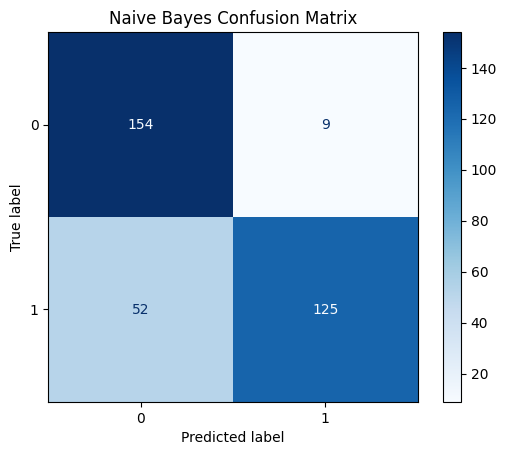

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
print("Naive Bayes Results")
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm_nb = confusion_matrix(y_test, y_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [ ]:
new=clf.predict(["Did they post their votes for Hillary already?"])
new

array([1])

In [ ]:
new=clf.predict(['United Kingdom Prime Minister Theresa May said Monday that the national threat level remains at â€œSevere,â€ meaning a terrorist attack is â€œhighly likely. â€[â€œJTAC  â€”   thatâ€™s the independent Joint Terrorism Analysis Centre  â€”   have confirmed that the national threat level remains at Severe that means that a terrorist attack is highly likely,â€ she said after a meeting of top national security officials.  She said police have put additional security measures in place to protect the public and provide reassurance, including additional security measures at a number of bridges in London. May said all three attackers in Saturdayâ€™s attack have been identified, and that when â€œprogress in the investigation permits,â€ their names will be released. She said 11 individuals are being held in police custody, following the search of two premises. Scotland Yard have subsequently identified two of the killers. â€œThe police are working hard to establish the identity of all of those who were tragically killed or injured in the event on Saturday night, but it is now clear that, sadly, victims came from a number of nationalities. This was an attack on London and the United Kingdom, but it was also an attack on the free world,â€ the Prime Minister said. There were seven people killed and at least 48 injured, including 21 critically, after the three attackers drove into pedestrians on the London Bridge, then got out and began stabbing people at pubs and restaurants at the Borough Market. The three attackers were shot and killed by police. Metropolitan Police Assistant Commissioner Mark Rowley urged anyone with information or footage of the incident to contact police. He said the public can expect to see additional police  â€”   both armed and unarmed  â€”   across London. â€œOur secrity and policing plans for events are being reviewed. The public will also see an increased physical measures in order to keep public safe on Londonâ€™s bridges,â€ he said. Rowley said the investigation was progressing â€œat pace, and significant progress has been made. â€œFinally, I ask the public to remain calm but vigilant  â€”   and if you see anything suspicious, no matter how insignificant you might think it is, please contact the   hotline on 0800 789 321. It may be a vital piece of information. â€'])
new

array([0])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib



X_train, X_test, y_train, y_test = train_test_split(train_balanced['text'], train_balanced['label'], test_size=0.2, random_state=42)


nb_pipeline = make_pipeline(TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)),MultinomialNB())
nb_pipeline.fit(X_train, y_train)
joblib.dump(nb_pipeline, '/content/drive/MyDrive/ml_project/nb_pipeline.pkl')



print("✅ model saved successfully!")

✅ model saved successfully!


/tmp/ipython-input-3039802764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


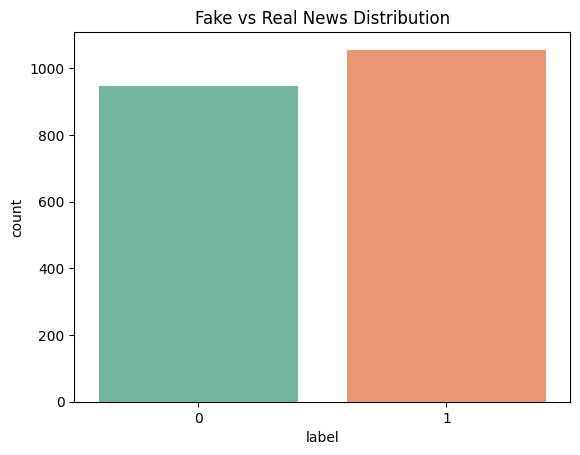

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df, palette='Set2')
plt.title("Fake vs Real News Distribution")
plt.show()


## MODEL 2:  Support Vector Classifier (SVC)

The SVC model, a high-performing classifier that finds the optimal separating hyperplane between classes, was implemented to compare against the baseline Naive Bayes.

| Key Metric | Result |
| :--- | :--- |
| **Overall Accuracy** | 0.9176 |
| **F1-Score (Fake News)** |  0.92  |
| **Training Speed** | Slower |

---

In [ ]:
def preprocess_text(text):
    text = text.lower()
    return text

In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

model_svm = make_pipeline(TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,2)),SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42))
model_svm.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear', probability=True,
                     random_state=42))])

In [157]:
important_words = ['gdp', 'quarterly', 'report', 'department']
vocab = tfidf.get_feature_names_out()
for w in important_words:
    print(f"{w}: {'Yes' if w in vocab else 'No'}")


gdp: Yes
quarterly: No
report: Yes
department: No


In [158]:
SVC(kernel='linear', class_weight='balanced', probability=True, C=1.0)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [159]:
proba = model_svm.predict_proba([new_text])[0]
print("Fake probability:", proba[1])
print("Real probability:", proba[0])


Fake probability: 0.9634893626338544
Real probability: 0.03651063736614553


In [167]:
threshold = 0.6
pred_class = 0 if proba[1] >= threshold else 1

if pred_class == 0:
    print("Prediction: Real News")
else:
    print("Prediction: fake News")


Prediction: Real News


In [168]:
y_pred_svm = model_svm.predict(X_test)
y_pred_svm

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,

SVC Results
Accuracy: 0.9176470588235294
F1-Score: 0.9195402298850575

Classification Report:
                precision    recall  f1-score   support

           0       0.90      0.93      0.92       163
           1       0.94      0.90      0.92       177

    accuracy                           0.92       340
   macro avg       0.92      0.92      0.92       340
weighted avg       0.92      0.92      0.92       340



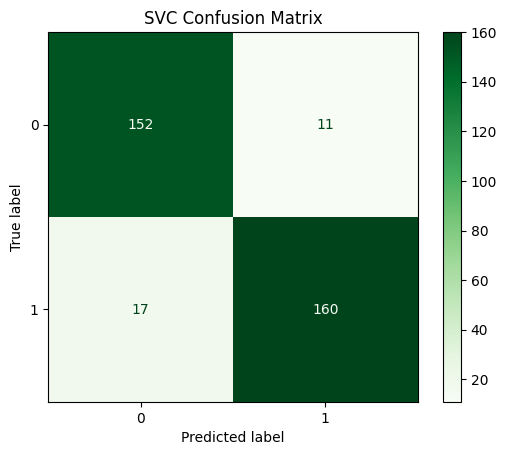

In [169]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt


print("SVC Results")

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-Score:", f1_score(y_test, y_pred_svm))
print("\nClassification Report:\n ", classification_report(y_test, y_pred_svm))


cm_svc = confusion_matrix(y_test, y_pred_svm)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot(cmap="Greens")
plt.title("SVC Confusion Matrix")
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import joblib

X_train, X_test, y_train, y_test = train_test_split(train_balanced['text'], train_balanced['label'], test_size=0.2, random_state=42)


svc_pipeline = make_pipeline(TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), SVC(kernel='linear', probability=True))
svc_pipeline.fit(X_train, y_train)
joblib.dump(svc_pipeline,'/content/drive/MyDrive/ml_project/svc_pipeline.pkl')



print("✅ SVC model saved successfully!")

✅ SVC model saved successfully!


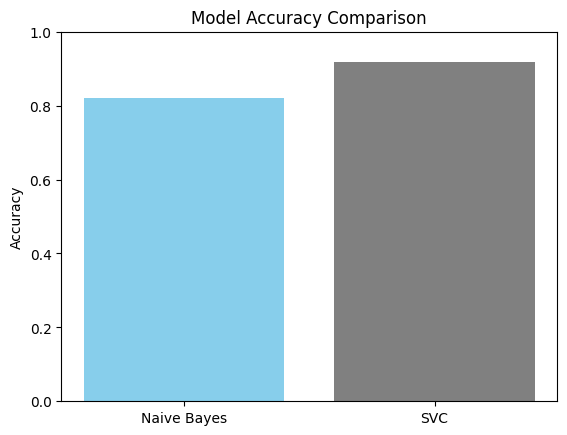

In [171]:
models = ['Naive Bayes','SVC']
scores = [ 0.8206,  0.9176]
plt.bar(models, scores, color=['skyblue','gray'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [172]:
new=model_svm.predict(['BREAKING: Insiders confirm that President Smith has secretly signed an executive order to permanently ban all coffee sales across the nation starting next week. Sources say the move is designed to combat a secret caffeine agenda.Mainstream media is totally silent on this monumental decision.'])
new

array([1])

In [173]:
new=model_svm.predict(['SHOCKING COVER-UP! A secret cabal of Hollywood elites and deep state officials was just exposed after an anonymous whistleblower released thousands of pages of top-secret documents'])
new

array([1])

In [174]:
new=model_svm.predict(['NASA successfully launched its new satellite into orbit, which will monitor climate change and provide valuable data for scientists worldwide.'])
new

array([1])

## Final Model Comparison and Selection

This project aimed to build a classification model to detect fake news. We compared two powerful machine learning algorithms: Multinomial Naive Bayes and Support Vector Classifier (SVC) using key metrics from the classification reports:

| Metric | Naive Bayes | SVC |
|:---|:---|:---|
| **Accuracy** | 0.8206 | **0.9176** |
| **F1-Score (Fake News - Class '1')** | 0.80 | **0.92** |
| **Training Speed** | **Very Fast** | Slower |

<br>

#Conclusion:

The Support Vector Classifier (SVC) is selected as the final model.

Although the Naive Bayes model trains much faster, the SVC demonstrates superior predictive performance, achieving a significantly higher accuracy of 0.9176 compared to NB's 0.8206.

Additionally, the SVC achieves an F1-Score of 0.92 for the Fake News class (label '1'), outperforming NB's 0.80. Since the F1-Score balances precision and recall, and minimizing both false positives and false negatives is critical in fake news detection, the SVC is the most robust and reliable model for this task.

# **STREAMLIT** **CODE**

In [176]:
requirements = """
streamlit
scikit-learn
numpy
pandas
joblib
"""
with open("/content/drive/MyDrive/ml_project/requirements.txt", "w") as f:
    f.write(requirements)


In [178]:
!ls "/content/drive/MyDrive/ml_project/app.py"


/content/drive/MyDrive/ml_project/app.py


In [179]:
!cat "/content/drive/MyDrive/ml_project/app.py"

import streamlit as st
import joblib
import os
import numpy as np

st.set_page_config(
    page_title="Fake News Detector",
    layout="wide",
    initial_sidebar_state="expanded",
)


APP_CSS = """
<style>
/* Global container */
.main > div.block-container{ padding-top:2rem; padding-left:2rem; padding-right:2rem; }

/* Header */
.header {
  display:flex; align-items:center; justify-content:space-between; gap:1rem;
}
.header .title { font-size:28px; font-weight:700; }
.header .tagline { color: #6b7280; font-size:14px; }

.card {
  background: linear-gradient(180deg, #ffffff 0%, #fbfdff 100%);
  border-radius: 12px; padding: 18px; box-shadow: 0 6px 20px rgba(15, 23, 42, 0.06);
}

.small-muted { color:#6b7280; font-size:13px; }

.footer {
  text-align:center; color:#9ca3af; padding:18px 0; font-size:13px;
}

.model-status { padding:6px 10px; border-radius:999px; font-weight:600; font-size:12px; }
.model-available { background-color:#e6ffed; color:#065f46; }
.model-missing { background-co